In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
url = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Replace with the actual URL or file path
data = pd.read_csv(url)

In [3]:
# 1. Check the first few rows of the dataset to get an overview
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 2. Check the dimensions of the dataset (rows, columns)
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Number of Rows: 7043
Number of Columns: 21


In [5]:
# 3. Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# 4. Summary statistics for numerical columns
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [7]:
# 5. Check for unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank t

In [8]:
# 6. Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# 7. Check the distribution of the target variable (Churn)
target_distribution = data['Churn'].value_counts(normalize=True)
print("Distribution of Churn:\n", target_distribution)

Distribution of Churn:
 No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


#Data Cleaning:


In [10]:
# 8. Handle Missing Values
# Check for missing values again
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
# 9. Remove Unnecessary Columns
# If there are any columns that are not relevant for analysis or modeling, you can remove them. For example, 'customerID' may not be needed for modeling.
data = data.drop(['customerID'], axis=1)

In [12]:
# Convert 'TotalCharges' column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [13]:
# Handle missing values in 'TotalCharges' (replace with mean, median, or any other strategy)
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [14]:
# 10. Encode Categorical Variables
# Encode categorical variables using one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [16]:
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [17]:
# Now, the categorical variables are encoded numerically.

# Let's recheck the data after cleaning
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


#Data Exploration(EDA):

###Univariate Analysis

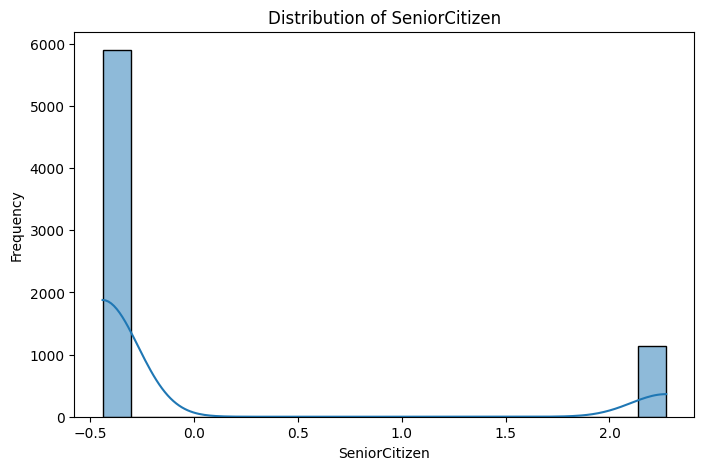

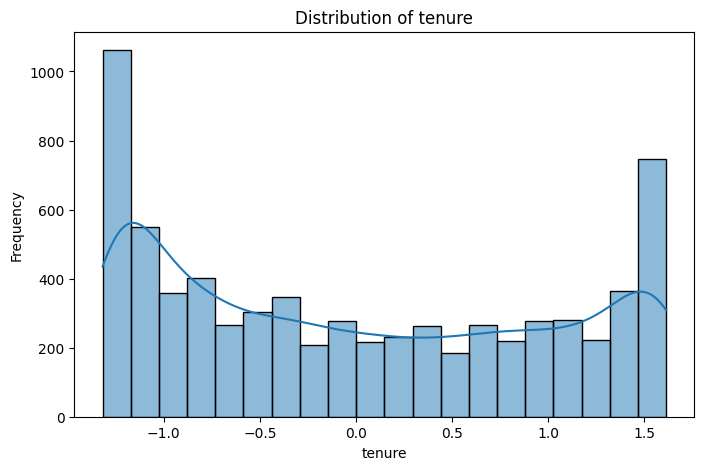

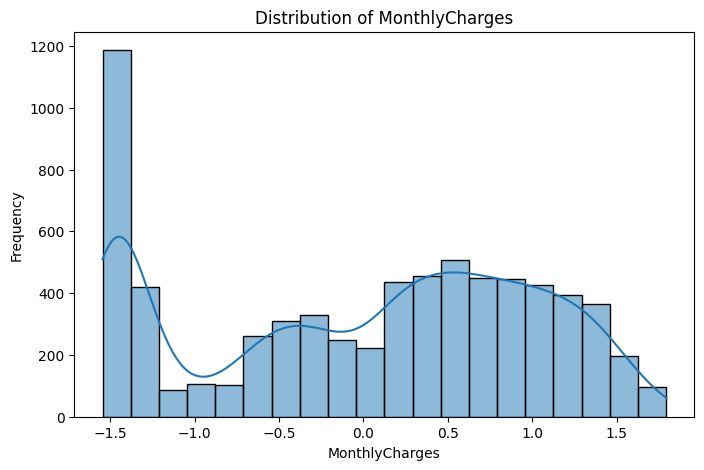

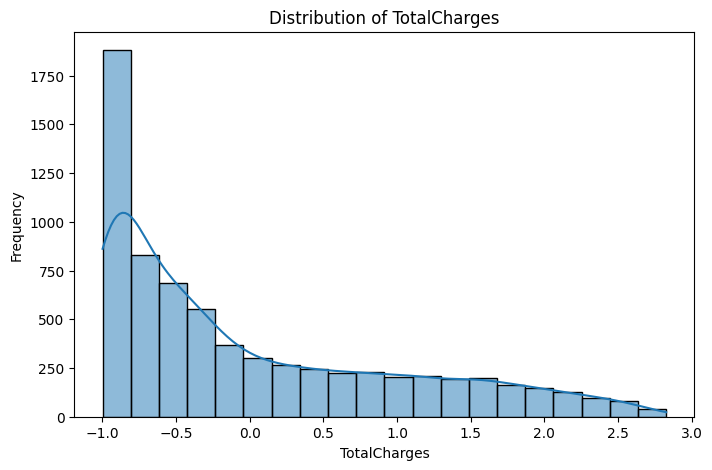

In [18]:
# Plot histograms for numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

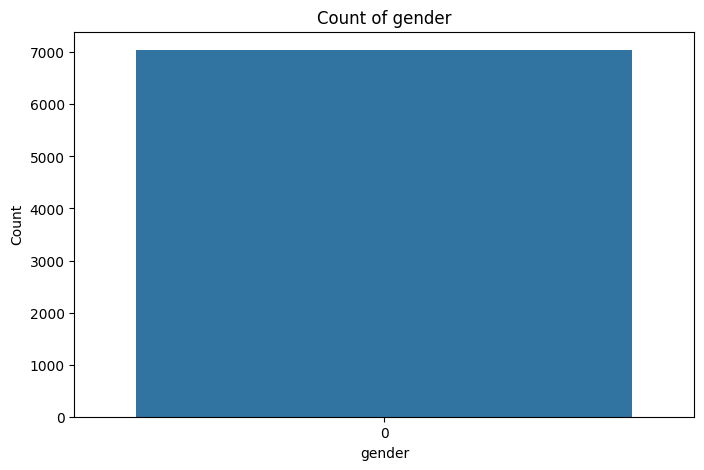

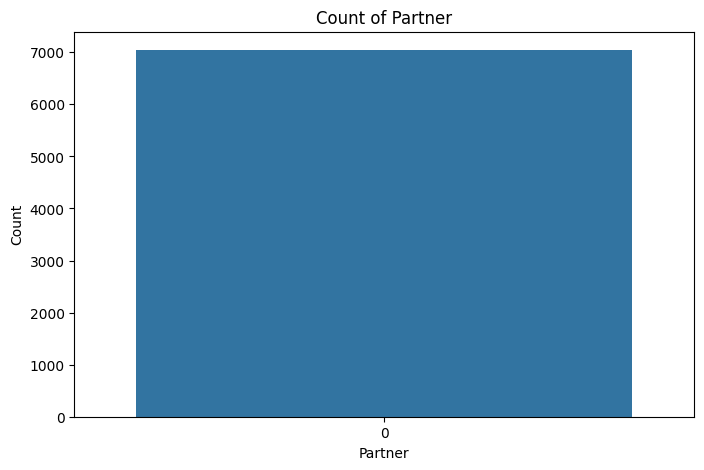

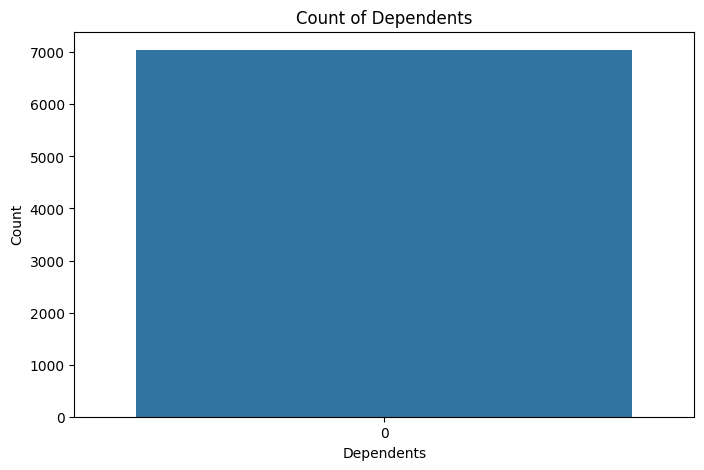

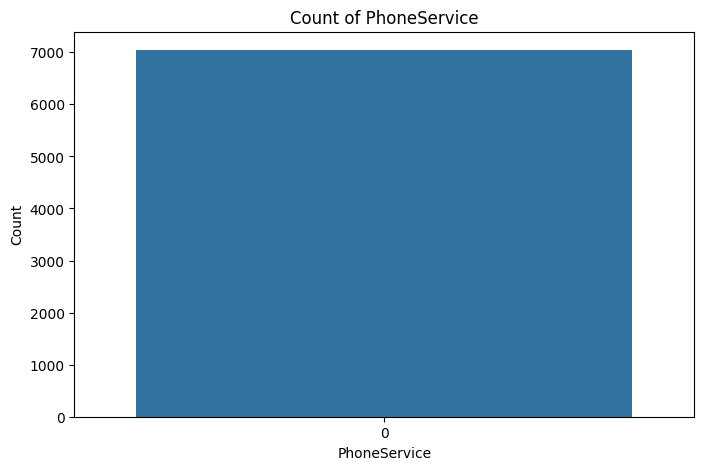

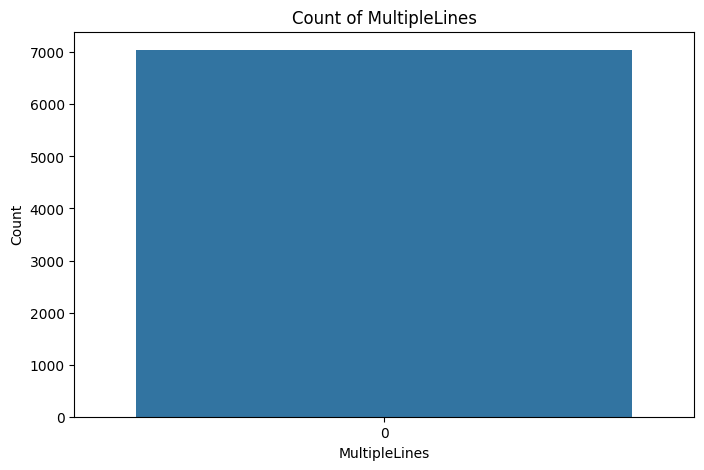

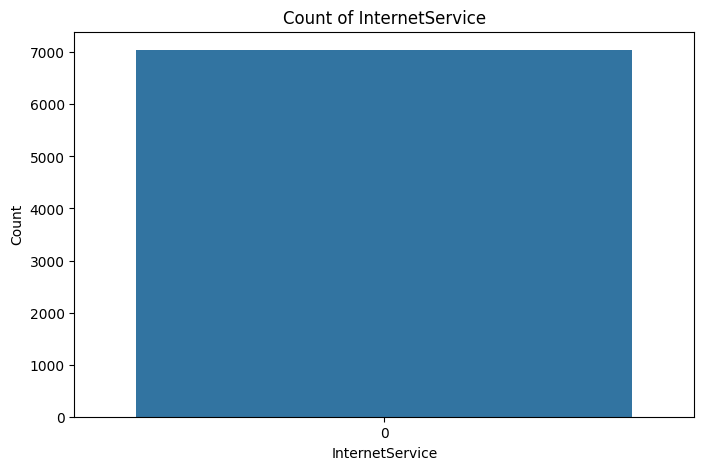

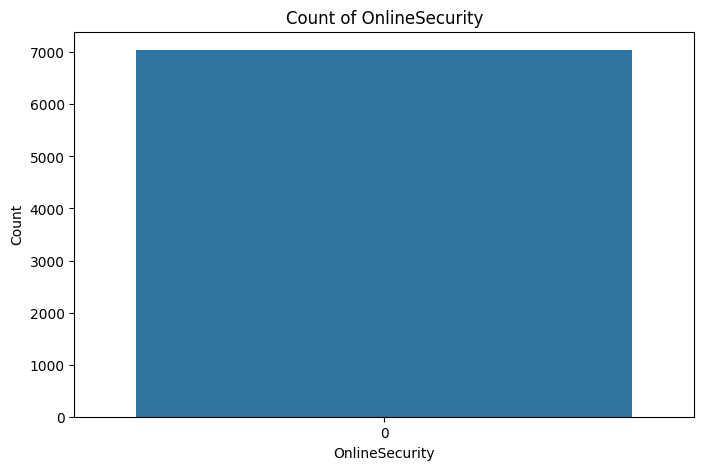

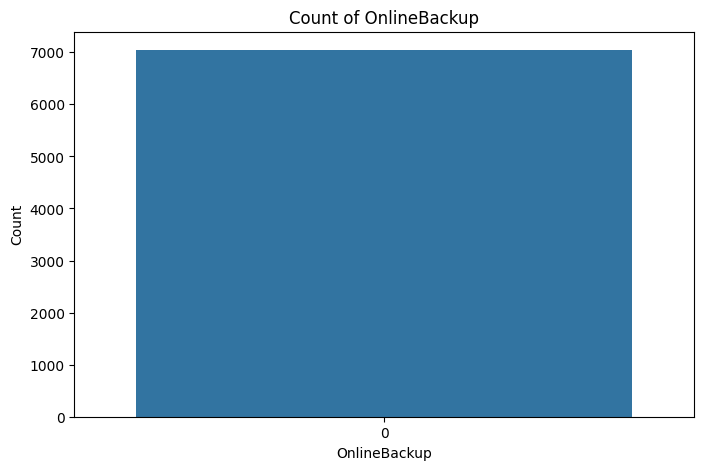

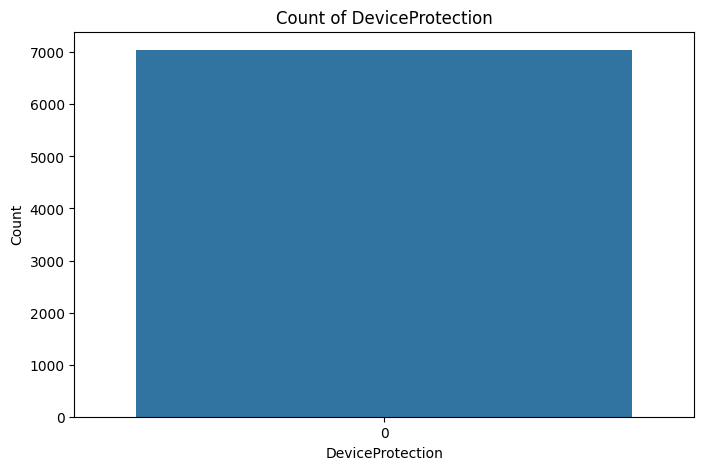

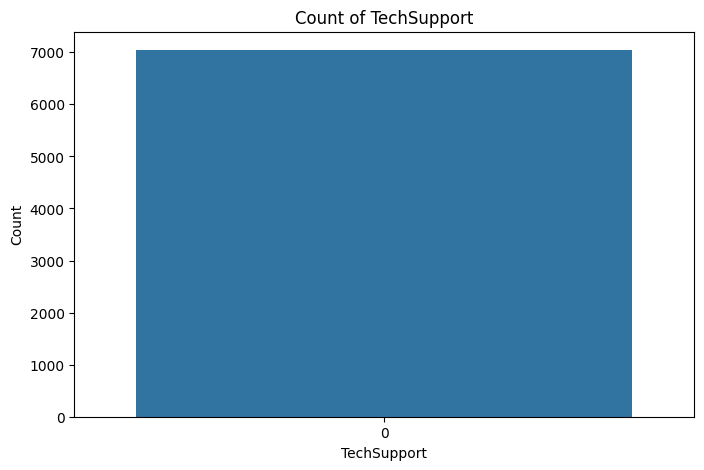

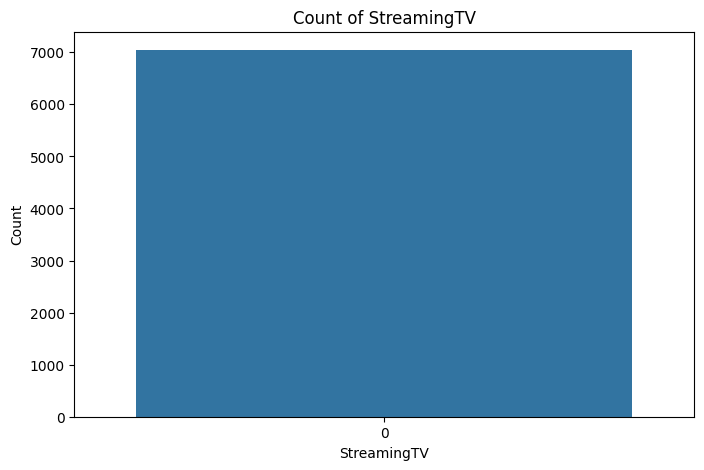

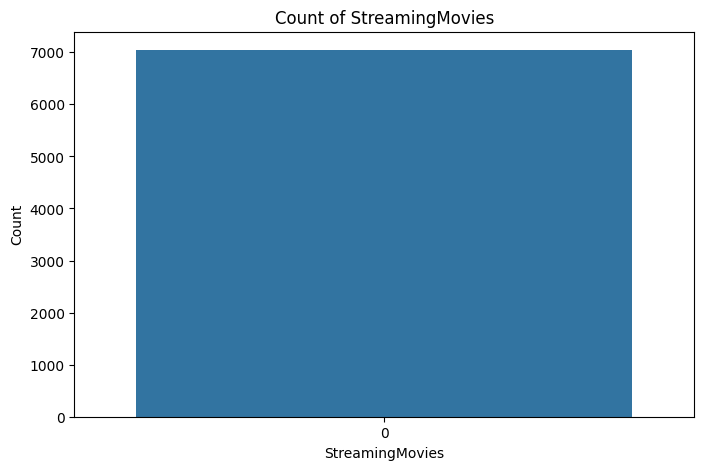

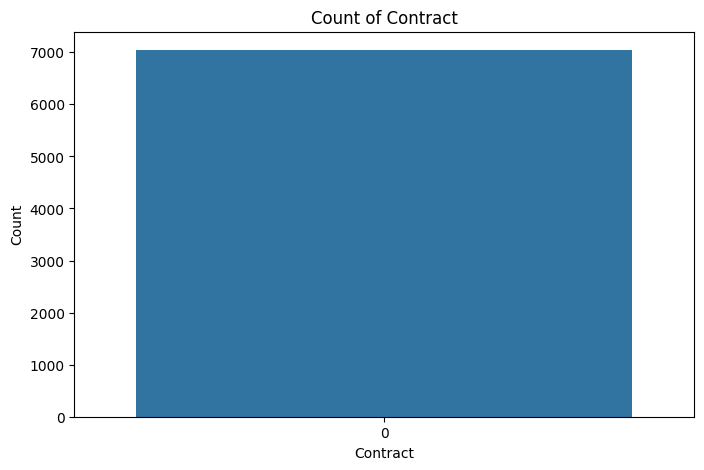

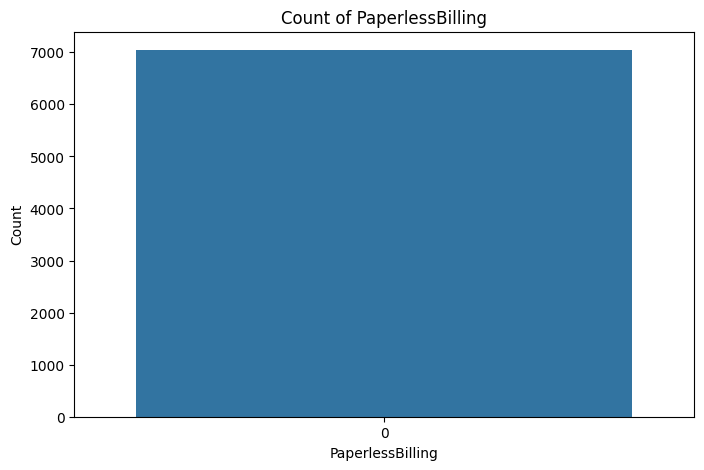

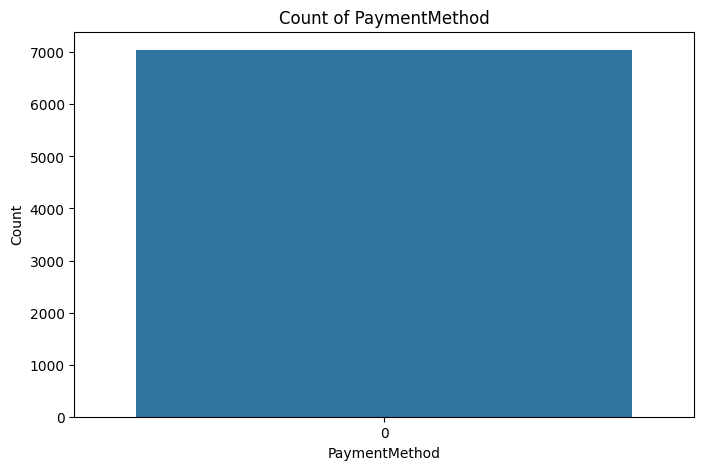

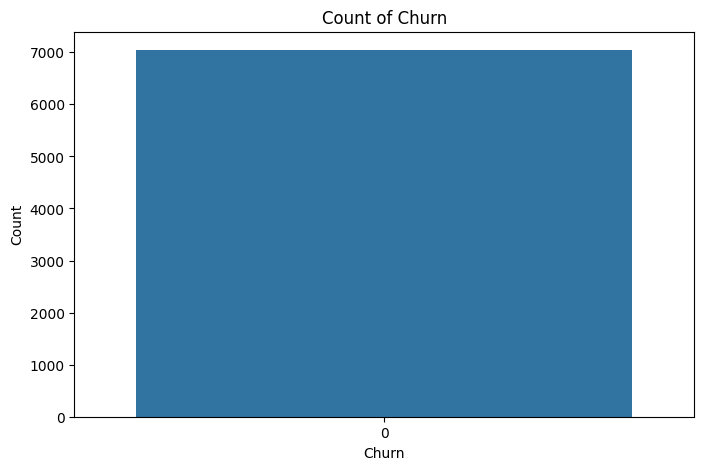

In [19]:
# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data[col])
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

###Bivariate Analysis

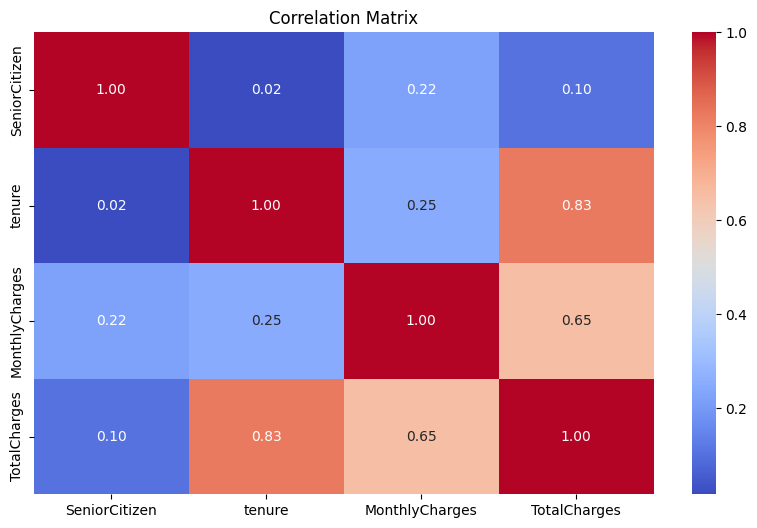

In [20]:
# Correlation matrix for numerical columns
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


###Churn Analysis

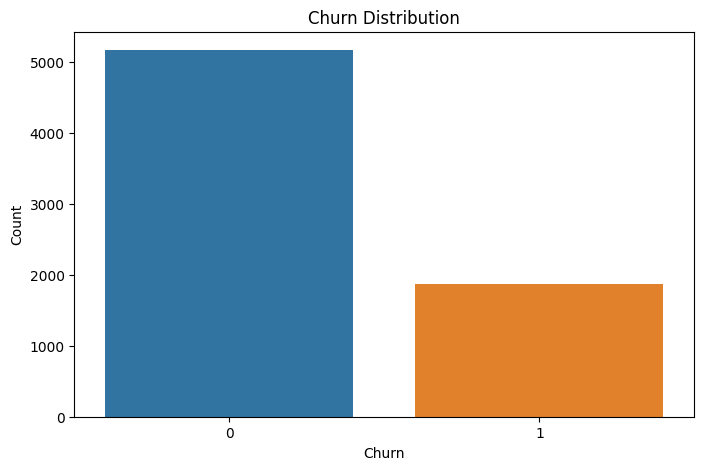

In [21]:
# Churn vs. other variables
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

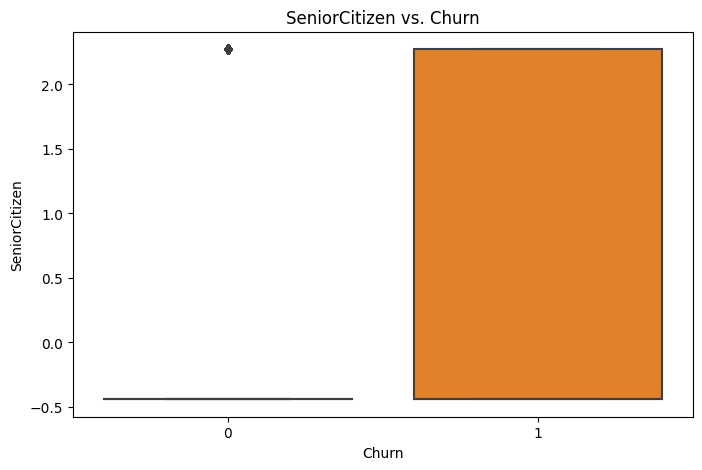

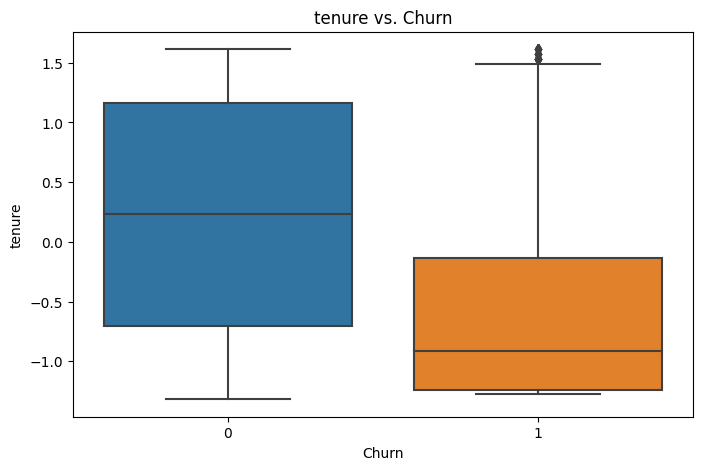

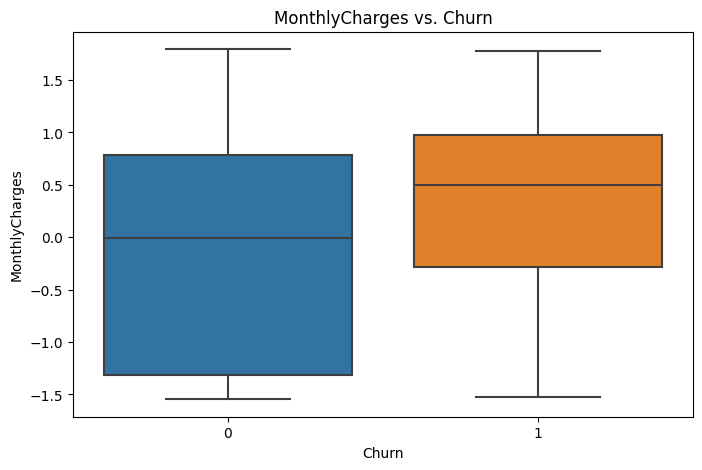

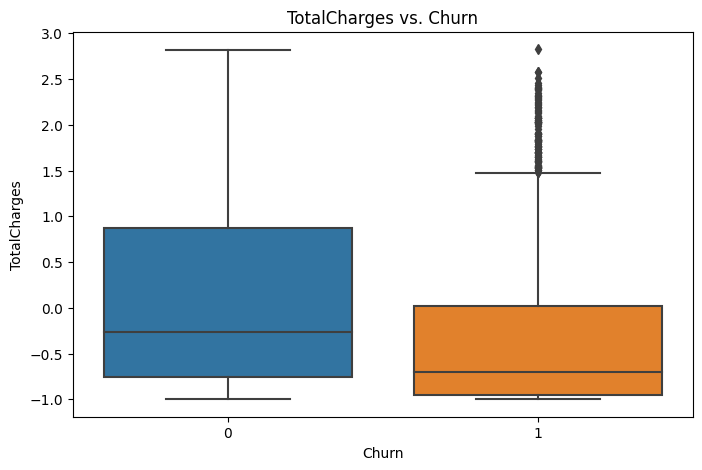

In [22]:
# Churn vs. Numeric variables
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f"{col} vs. Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

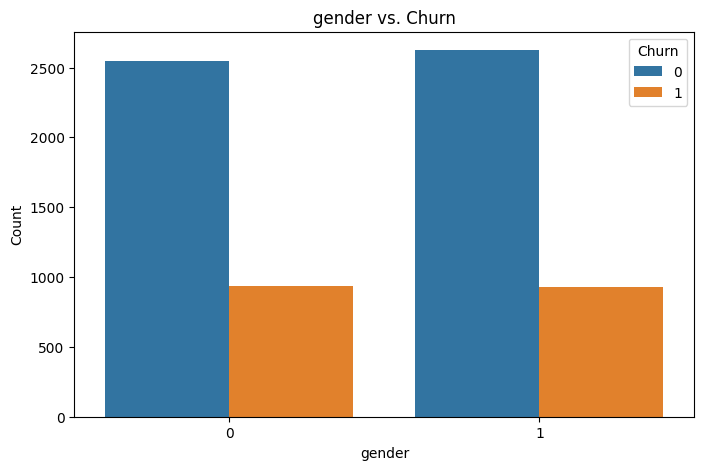

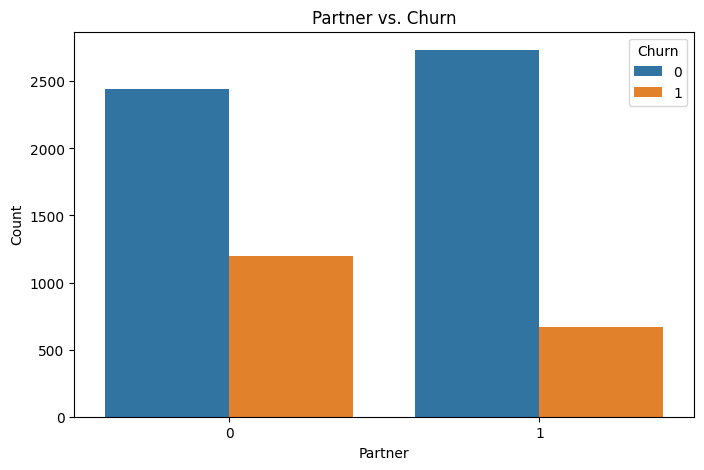

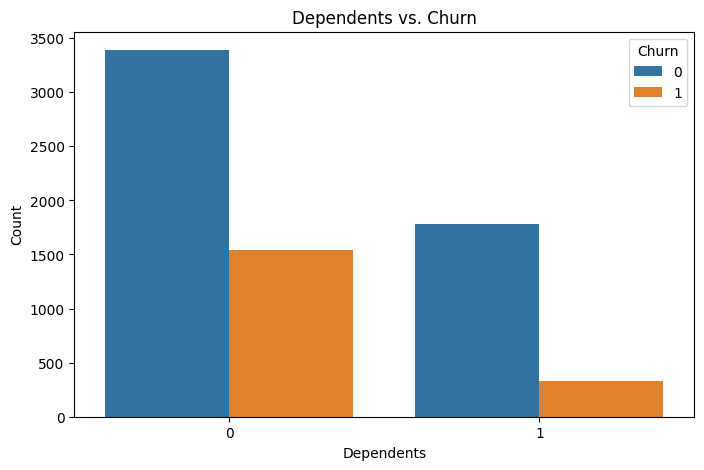

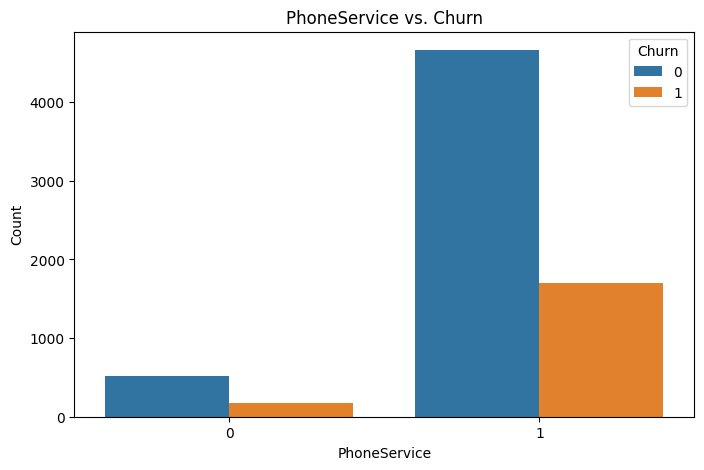

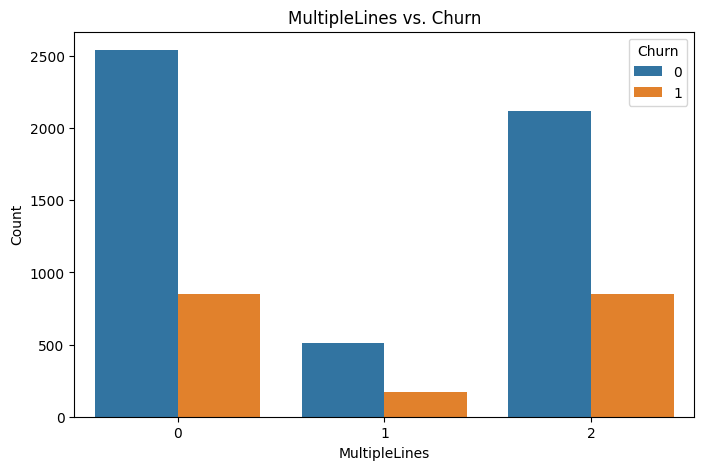

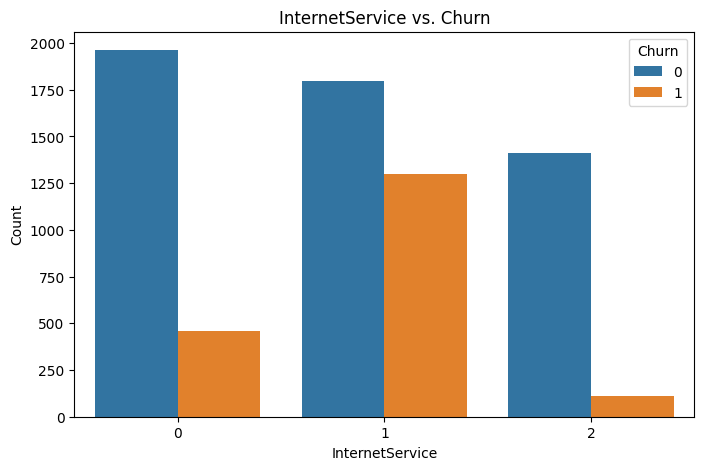

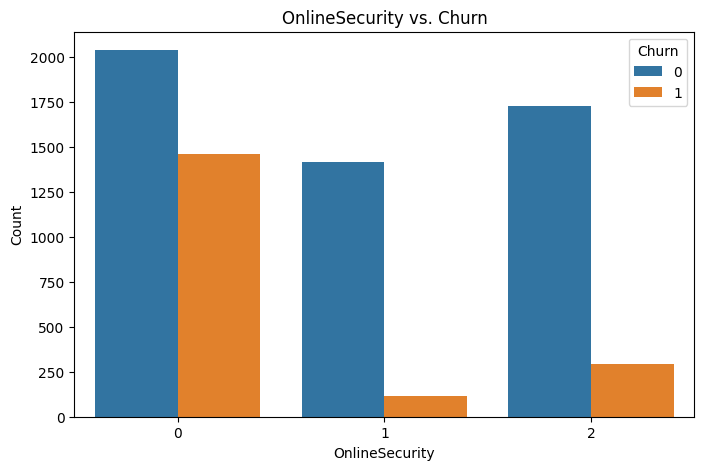

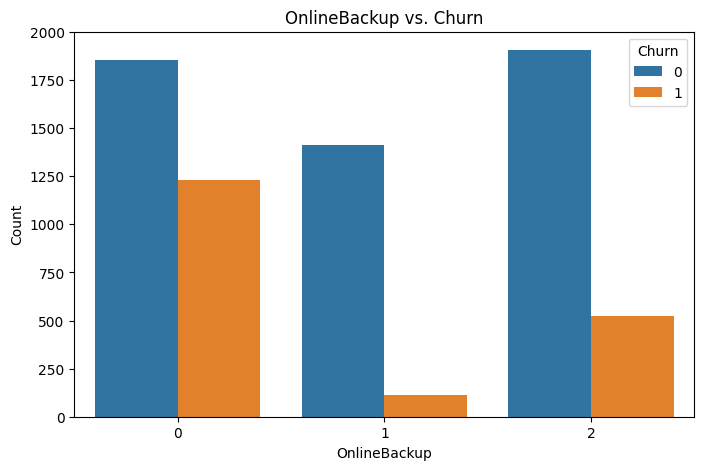

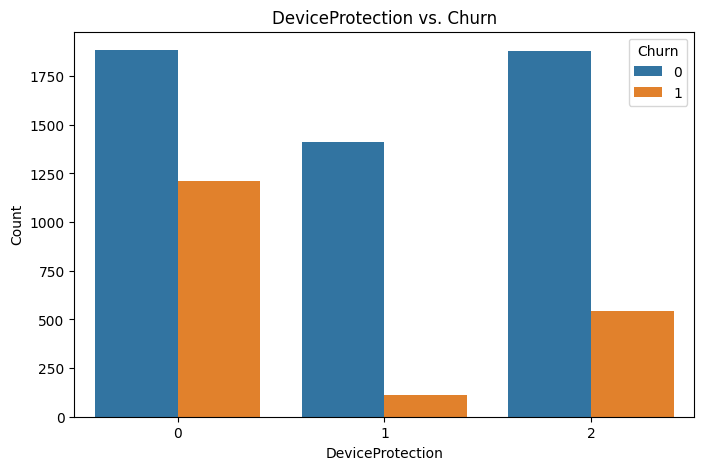

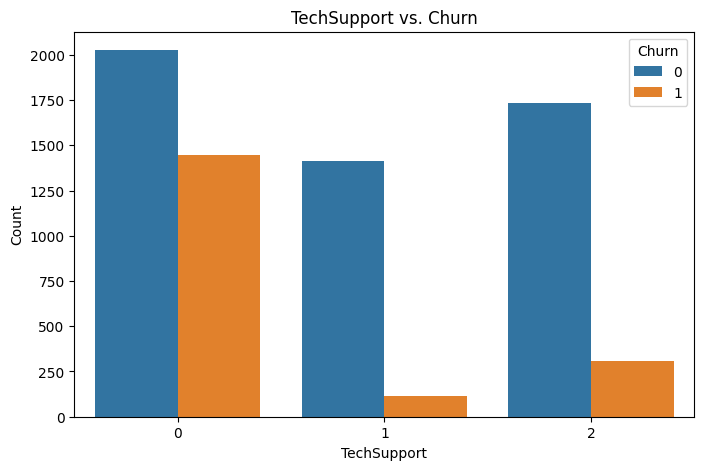

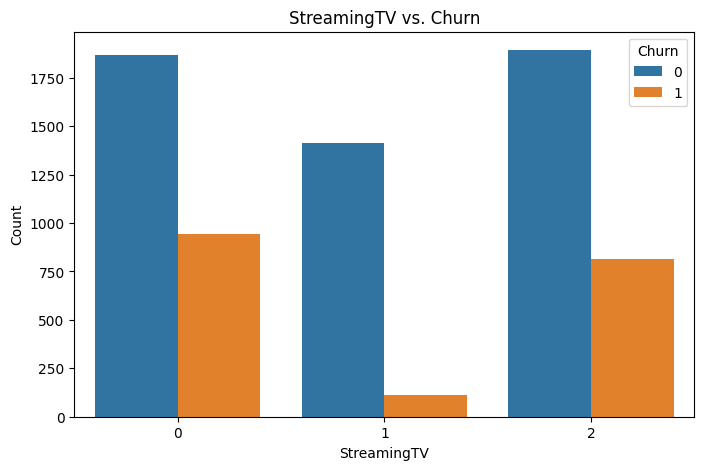

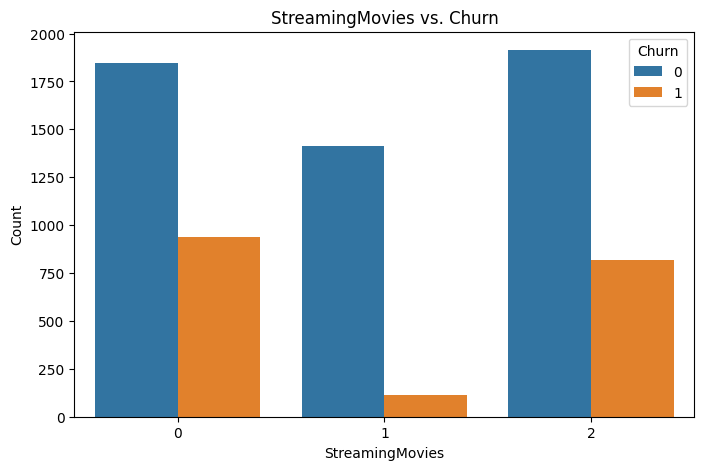

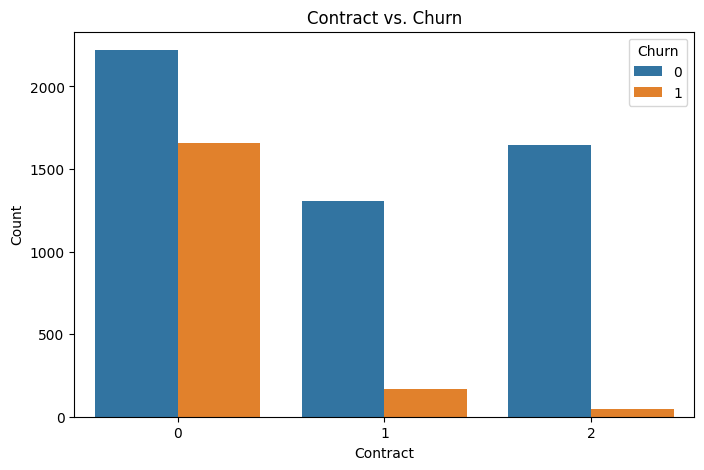

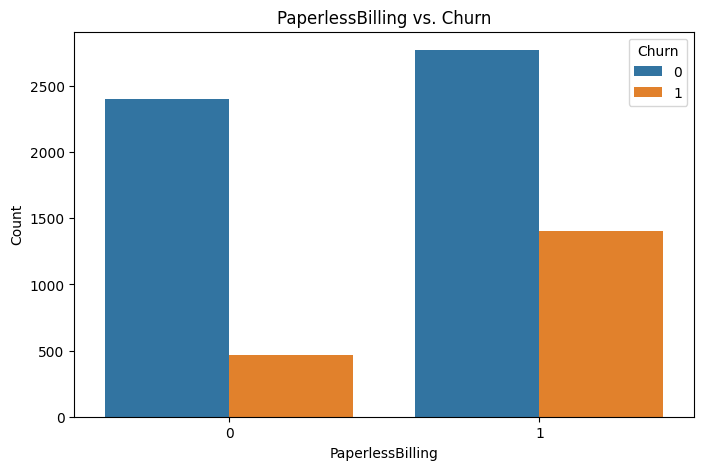

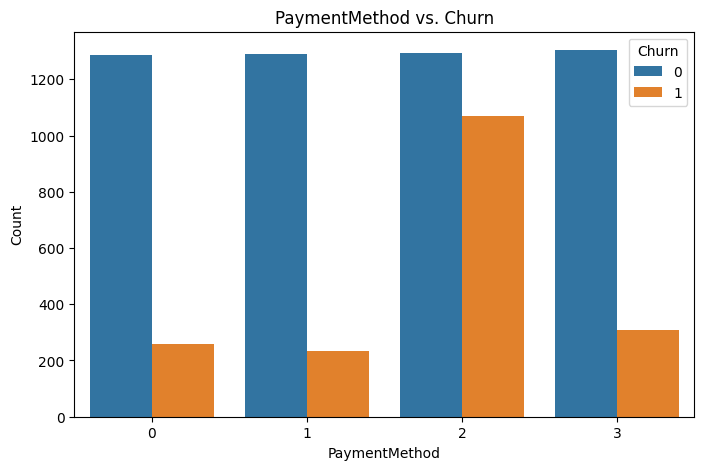

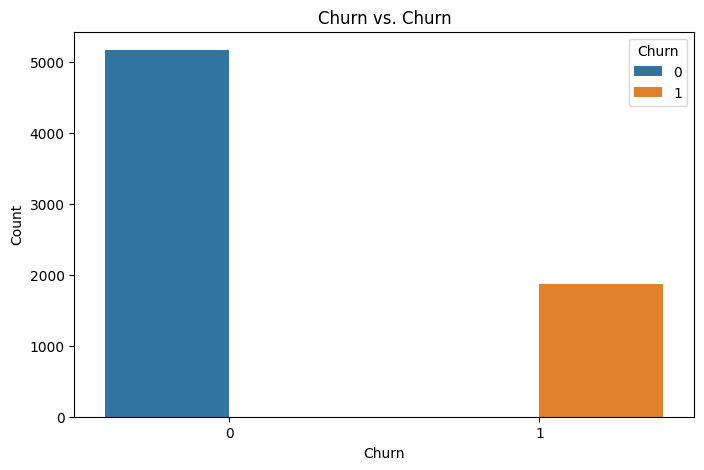

In [23]:
# Churn vs. Categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f"{col} vs. Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn", loc="upper right")
    plt.show()

#Feature Engineering:

In [24]:
#12. Create New Features
#create a feature 'MonthlyChargesPerTenure' to represent the average monthly charge per tenure.
data['MonthlyChargesPerTenure'] = data['MonthlyCharges'] / data['tenure']

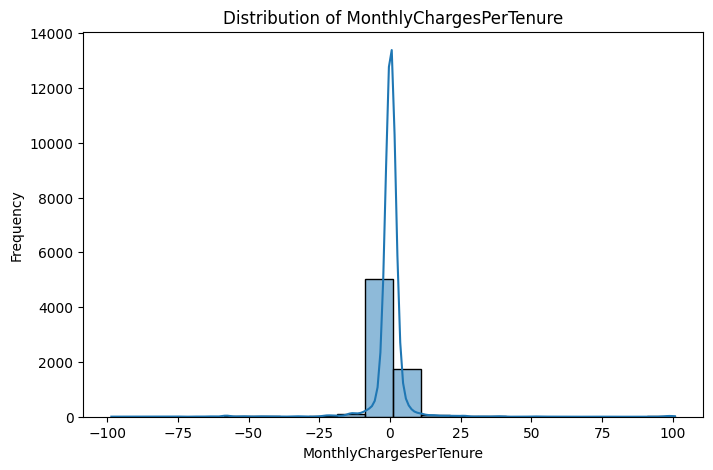

In [25]:
# Check the distribution of the new feature
plt.figure(figsize=(8, 5))
sns.histplot(data['MonthlyChargesPerTenure'], bins=20, kde=True)
plt.title('Distribution of MonthlyChargesPerTenure')
plt.xlabel('MonthlyChargesPerTenure')
plt.ylabel('Frequency')
plt.show()

In [26]:
# 13. Final Dataset
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesPerTenure
0,0,-0.439916,1,0,-1.277445,0,1,0,0,2,...,0,0,0,0,1,2,-1.160323,-0.994242,0,0.908316
1,1,-0.439916,0,0,0.066327,1,0,0,2,0,...,0,0,0,1,0,3,-0.259629,-0.173244,0,-3.914353
2,1,-0.439916,0,0,-1.236724,1,0,0,2,2,...,0,0,0,0,1,3,-0.362660,-0.959674,1,0.293243
3,1,-0.439916,0,0,0.514251,0,1,0,2,0,...,2,0,0,1,0,0,-0.746535,-0.194766,0,-1.451694
4,0,-0.439916,0,0,-1.236724,1,0,1,0,0,...,0,0,0,0,1,2,0.197365,-0.940470,1,-0.159587


#Data Splitting


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# 14. Define features (X) and the target variable (y)
X = data.drop(['Churn'], axis=1)
y = data['Churn']


In [29]:
# Split the dataset into training and testing sets (typically 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Print the shapes of the split datasets
print("Training Data - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing Data - Features:", X_test.shape, " Target:", y_test.shape)

Training Data - Features: (5634, 20)  Target: (5634,)
Testing Data - Features: (1409, 20)  Target: (1409,)


In [31]:
X_train['MonthlyChargesPerTenure'] = X_train['MonthlyChargesPerTenure'].replace([np.inf, -np.inf], np.nan)

In [32]:
# Remove rows with NaN values
X_train = X_train.dropna()

In [33]:
X_train.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyChargesPerTenure
2142,0,-0.439916,0,1,-0.463037,1,0,0,2,0,2,0,0,2,1,0,3,0.002935,-0.417250,-0.006339
1623,0,-0.439916,0,0,0.880735,1,2,1,0,2,0,0,2,2,2,1,0,1.078118,1.257128,1.224112
6074,1,-0.439916,1,0,-1.277445,0,1,0,0,0,0,0,0,0,0,1,2,-1.373033,-0.997067,1.074828
1362,1,-0.439916,0,0,-1.155283,1,0,1,0,0,0,0,0,0,0,1,2,0.180747,-0.902370,-0.156453
6754,1,-0.439916,0,1,-1.318165,1,2,0,2,2,0,2,0,0,2,1,0,-0.095111,-0.390463,0.072154
1212,1,-0.439916,0,0,-1.033122,1,0,1,0,0,0,0,0,0,0,1,2,0.159144,-0.777255,-0.154042
2722,1,-0.439916,1,1,-0.015113,1,0,2,1,1,1,1,1,1,2,0,3,-1.522595,-0.736374,100.745292
4006,1,-0.439916,1,1,1.613701,1,0,2,1,1,1,1,1,1,2,1,1,-1.494344,-0.382881,-0.926035
6791,1,-0.439916,0,0,-0.544478,0,1,0,0,0,2,0,2,0,0,1,2,-0.834611,-0.683661,1.532864
5466,1,-0.439916,0,1,-0.910961,1,0,2,1,1,1,1,1,1,1,1,0,-1.489359,-0.910515,1.634931


In [34]:
y_train.head(10)

2142    0
1623    0
6074    1
1362    1
6754    0
1212    0
2722    0
4006    0
6791    1
5466    0
Name: Churn, dtype: int32

#Model Selection

##RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Choose a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

#### 16. Model Training

In [37]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# 17. Model Evaluation

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [40]:
# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [41]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[940  96]
 [192 181]]


In [42]:
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



##LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
# 15. Model Selection - Choose a different machine learning algorithm
model = LogisticRegression(random_state=42, max_iter=1000)  # Logistic Regression

In [44]:
# 16. Model Training
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
# 17. Model Evaluation
y_pred = model.predict(X_test)

In [46]:
# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [47]:
# Print the evaluation results for the Logistic Regression model
print(f'Accuracy (Logistic Regression): {accuracy:.2f}')

Accuracy (Logistic Regression): 0.82


In [48]:
print(f'Confusion Matrix (Logistic Regression):\n{conf_matrix}')

Confusion Matrix (Logistic Regression):
[[934 102]
 [156 217]]


In [49]:
print(f'Classification Report (Logistic Regression):\n{classification_rep}')

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



##GradientBoostingClassifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [52]:
# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

In [53]:
# Evaluate the Gradient Boosting Classifier model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [54]:
# Print the evaluation results for the Gradient Boosting Classifier model
print(f'Accuracy (Gradient Boosting Classifier): {accuracy:.2f}')

Accuracy (Gradient Boosting Classifier): 0.81


In [55]:
print(f'Confusion Matrix (Gradient Boosting Classifier):\n{conf_matrix}')

Confusion Matrix (Gradient Boosting Classifier):
[[942  94]
 [180 193]]


In [56]:
print(f'Classification Report (Gradient Boosting Classifier):\n{classification_rep}')

Classification Report (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#Model Evaluation

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [58]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Churn)

In [59]:
# Calculate and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [60]:
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.81
ROC AUC Score: 0.86


In [61]:

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Confusion Matrix:
[[942  94]
 [180 193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



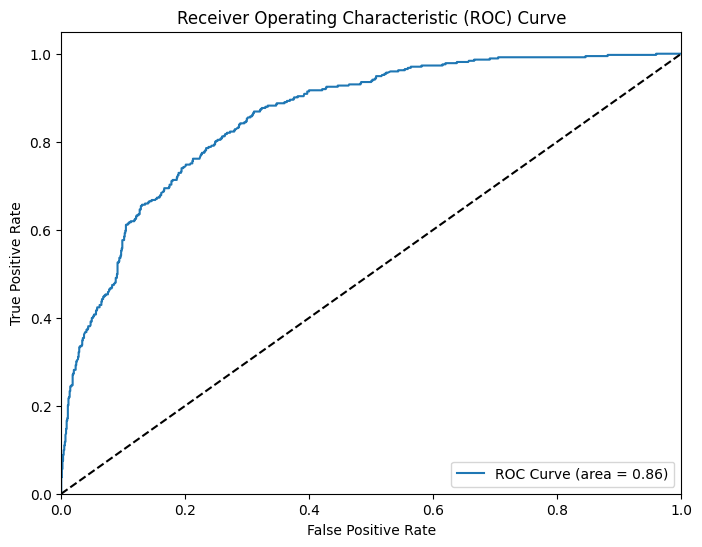

In [62]:
# 19. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Define a range of hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}

In [65]:
# Create a GridSearchCV object with the Gradient Boosting Classifier and the parameter grid
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',  # You can choose a different scoring metric if needed
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)


In [66]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [67]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [68]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}


In [69]:
# 21. Model Evaluation with Best Hyperparameters

# Make predictions using the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Churn)

In [70]:
# Calculate and display evaluation metrics for the tuned model
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [71]:
print(f'ROC AUC Score (Tuned Model): {roc_auc:.2f}')
print(f'Confusion Matrix (Tuned Model):\n{conf_matrix}')
print(f'Classification Report (Tuned Model):\n{classification_rep}')

ROC AUC Score (Tuned Model): 0.86
Confusion Matrix (Tuned Model):
[[955  81]
 [186 187]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Final Model Training

In [72]:
# Train the final model with the best hyperparameters using the entire training dataset
final_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    random_state=42
)

In [73]:
final_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300,
                           random_state=42)

In [74]:
# 23. Model Evaluation (Final Model)

# Make predictions using the final model
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Churn)

In [75]:
# Calculate and display evaluation metrics for the final model
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [76]:
print(f'ROC AUC Score (Final Model): {roc_auc:.2f}')
print(f'Confusion Matrix (Final Model):\n{conf_matrix}')
print(f'Classification Report (Final Model):\n{classification_rep}')


ROC AUC Score (Final Model): 0.86
Confusion Matrix (Final Model):
[[955  81]
 [186 187]]
Classification Report (Final Model):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Final Evaluation

In [77]:
# 24.1. Feature Importance (for Gradient Boosting models)

# Check feature importance for the final model (if applicable)
if isinstance(final_model, GradientBoostingClassifier):
    feature_importance = final_model.feature_importances_

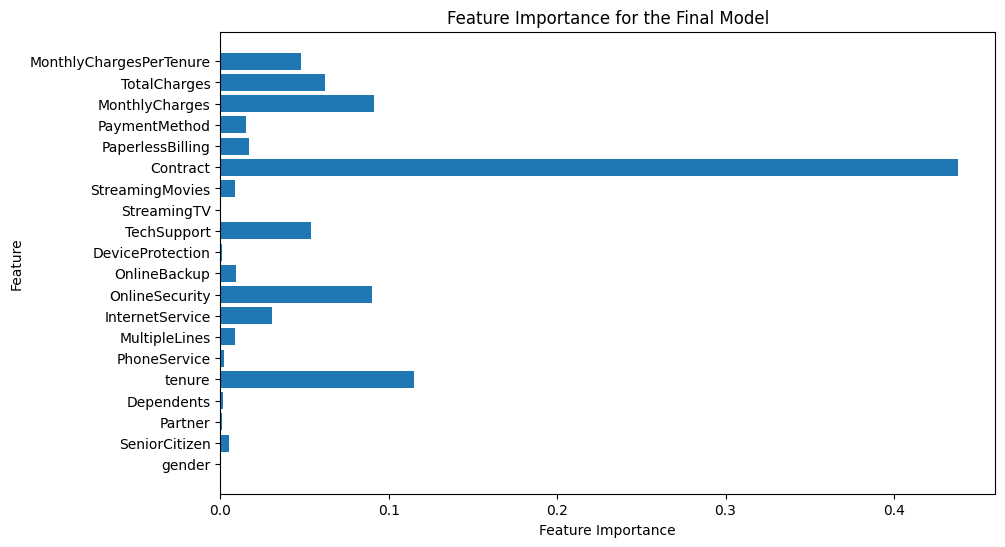

In [78]:
 # Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for the Final Model')
plt.show()

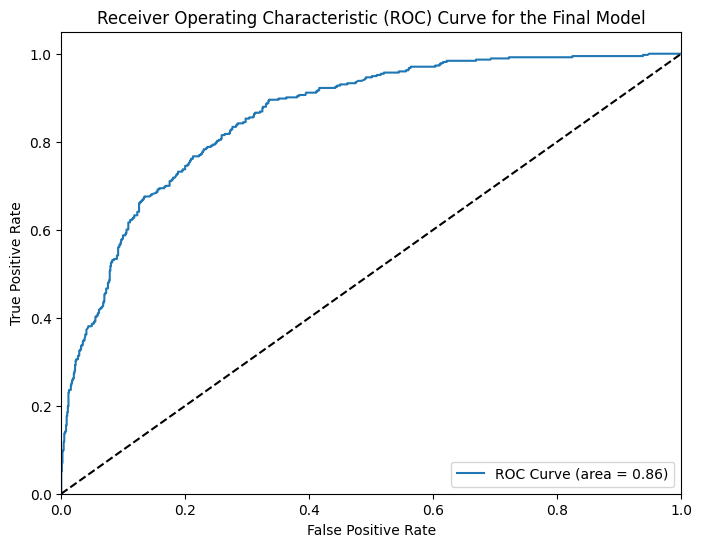

In [79]:
# 24.2. ROC Curve for the Final Model
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Final Model')
plt.legend(loc='lower right')
plt.show()